In [1]:
import pandas as pd
from annotation_data_model import AnnotationSample

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Sentence level (Independent from article level)
- Conclusion: mfd2 seems better in dictionary based methods.
- TODO:
    - Try DDR

In [2]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

mfd_vers = {
    'mfd': None, 
    'mfd2': None, 
    'emfd': None
}

for mfd_ver in mfd_vers.keys():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    df_list = []
    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]
        df_list.append(df)
        df[f'{mfd_ver}_match_len'] = df[f'{mfd_ver}_match'].apply(lambda x: len(x) if x is not None else 0)
        # df['sanity_check'] = df[f'{mfd_ver}_match_len'] - df[f'{mfd_ver}_count']
        # if df['sanity_check'].sum() != 0:
        #     print(f'Something is wrong in the row(s) of dataframe [{i}] below.')
        #     print(df[df['sanity_check']!=0])
    
    mfd_vers[mfd_ver] = pd.concat(df_list)
    mfd_vers[mfd_ver] = mfd_vers[mfd_ver].reset_index(drop=True)

               count_all  count_relevant  percentage
mfd_match_len                                       
0                    214              67    0.313084
1                     85              43    0.505882
2                     25               9    0.360000
3                     12               7    0.583333
4                      2               1    0.500000
6                      1               1    1.000000


<Axes: xlabel='mfd_match_len'>

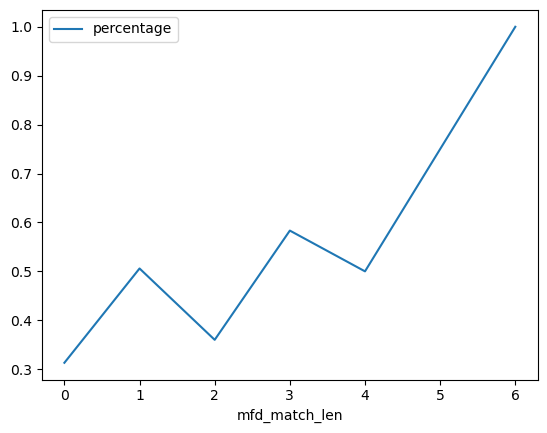

In [7]:
mfd_ver = 'mfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

                count_all  count_relevant  percentage
mfd2_match_len                                       
0                     190              51    0.268421
1                      89              38    0.426966
2                      43              26    0.604651
3                      11               8    0.727273
4                       3               2    0.666667
5                       3               3    1.000000


<Axes: xlabel='mfd2_match_len'>

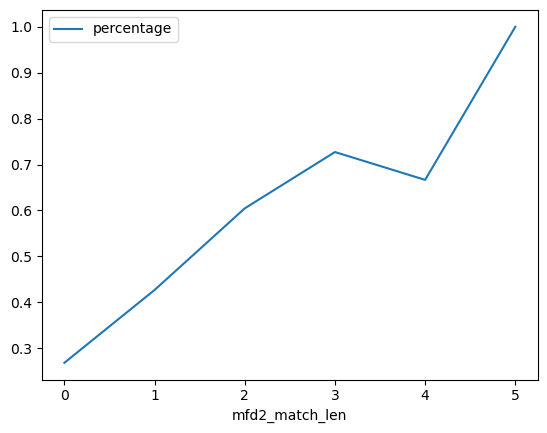

In [8]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

                count_all  count_relevant  percentage
emfd_match_len                                       
0                      16               1    0.062500
1                      27               0    0.000000
2                      18               4    0.222222
3                      27               4    0.148148
4                      23               8    0.347826
5                      34              14    0.411765
6                      27              14    0.518519
7                      31              11    0.354839
8                      33              20    0.606061
9                      23              11    0.478261
10                     18              12    0.666667
11                     14               8    0.571429
12                     11               3    0.272727
13                      7               5    0.714286
14                      8               5    0.625000
15                      4               2    0.500000
16                      2   

<Axes: xlabel='emfd_match_len'>

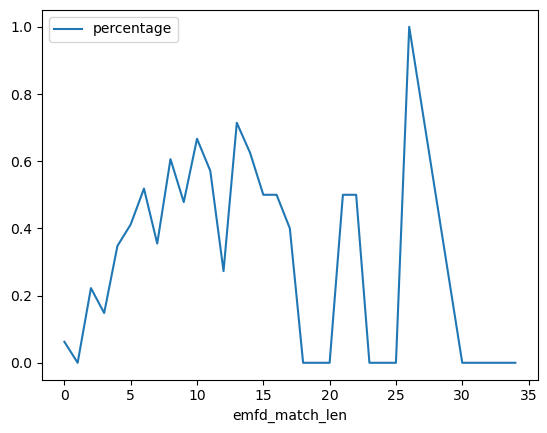

In [9]:
mfd_ver = 'emfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

In [10]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
num_relevance = df_mfd['MF Relevance'].sum()
total_num = len(df_mfd)

print('num_relevance', num_relevance)
print('total_num', total_num )
print('Percentage', num_relevance/total_num)

num_relevance 128
total_num 339
Percentage 0.3775811209439528


### Article level

In [ ]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

mfd_vers = {
    'mfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'mfd2': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'emfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}
}

for mfd_ver, info_dict in mfd_vers.items():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]

        mfd_vers[mfd_ver]['count_mf_relevance'].append(df['MF Relevance'].sum())
        mfd_vers[mfd_ver]['count_mf_match'].append(df[f'{mfd_ver}_count'].sum())
        mfd_vers[mfd_ver]['unit_num'].append(len(df))

    mfd_vers[mfd_ver] = pd.DataFrame(mfd_vers[mfd_ver])

mfd_vers['mfd'] 

In [ ]:
for mfd_ver, df in mfd_vers.items():
    mfd_vers[mfd_ver]['count_match_norm'] = df['count_mf_match'] / df['unit_num']
    mfd_vers[mfd_ver].plot.scatter(y='count_mf_relevance', x='count_match_norm', title=mfd_ver)

# `count_mf_relevance` is the total number of mf relevant label in an article.
# `count_match_norm` is the total number of words in an article matching with mfd, 
#  normalised by the number of unit.